### Twitter Analysis of Corona virus in May

In [1]:
import pandas as pd
import tweepy
import json
import csv
import os
import gender_guesser.detector as gender
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading in the CSV File
df = pd.read_csv (r'twitter_outputCoronaVirusMay.csv')
df.columns = ['hashtags','id','text','name', 'user', 'user_loc', 'user_desc', 'user_followers', 'user_friend', 'user_listed', 'user_created', 'user_favs','user_statuses']
print (df)

                                                hashtags                   id  \
0                                            ['COVID19']  1264699287138598912   
1                                        ['coronavirus']  1264699287121920001   
2                    ['BTK_P23A_VillasAffectiesKarachi']  1264699287553953793   
3                                                     []  1264699287788826625   
4                                            ['COVID19']  1264699288153710592   
5                                                     []  1264699288677830656   
6                                              ['COVID']  1264699288694722564   
7                                                     []  1264699288862420993   
8                                                     []  1264699290166976513   
9                                        ['coronavirus']  1264699290540060674   
10                                                    []  1264699290925948934   
11                  ['SaveTh

## Which gender is Tweeting?

In [3]:
detector = gender.Detector()
gender_predictions = []
for name in df['name']:
    genderPrediction = detector.get_gender(name)
    gender_predictions.append(genderPrediction)

df['GenderPrediction'] = gender_predictions
print(df['GenderPrediction'].value_counts())

unknown          57455
female            1774
male              1349
mostly_female      213
mostly_male        168
andy               108
Name: GenderPrediction, dtype: int64


##### Analysis:
1774 females have tweeted about Corona in May in comparison to 1391 male.

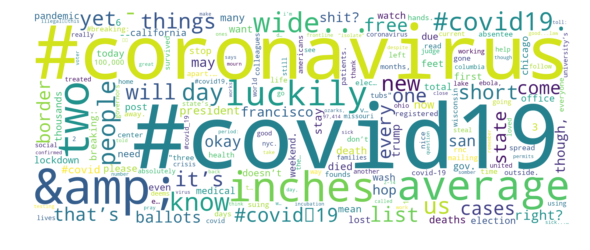

In [4]:
from collections import Counter
words = []
for tweet in df['text']:
    tweet = str(tweet).lower() # Convert to string
    tweets = [i  for i in tweet.split()] # Grab individual tags
    for word in tweets: # Loop through all potential tags
        if word != "":
            words.append(word) # Add a tag if it's not empty
            
word_map = Counter(words) # Variable that holds all hashtag counts
handles=[]
links=[]
company_name=[]
for key in word_map:
    if '@' in key:
        handles.append(key)
    elif 'https' in key:
        links.append(key)
stopwords = set(STOPWORDS)
stopwords.update(["rt"])
stopwords.update(handles)
stopwords.update(links)
stopwords.update(company_name)
delete=[key for key in word_map if key in stopwords]
for key in delete:
    del word_map[key]
wordcloud = WordCloud(stopwords=stopwords, width = 2000, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(word_map)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

##### Analysis:
In May, during the pandemic, most of the world was aware of the virus, its symptoms and accustom to the "quarantine life". Examples can be seen with words such as, "know", "luckily", "average", "americans", "lockdown". Information surrounding the virus by this point in time is well know.

### Tweets based on location:

In [5]:
print(df['user_loc'].value_counts())

United States                    1625
USA                               638
California, USA                   553
Florida, USA                      397
Texas, USA                        379
Canada                            338
Los Angeles, CA                   267
Washington, DC                    261
New York, NY                      260
Toronto, Ontario                  248
Australia                         242
India                             238
Pennsylvania, USA                 185
New York, USA                     178
Chicago, IL                       165
Toronto                           161
United Kingdom                    156
Texas                             149
North Carolina, USA               148
Earth                             146
Virginia, USA                     142
New York                          140
Boston, MA                        137
Ontario, Canada                   135
New Jersey, USA                   135
San Diego, CA                     132
London, Engl

##### Analysis: 
Most popular region collected is the United States followed by the United Kingdom and then Canada. Similar to the analysis in March.

### Tweets based on Hashtag function:

In [6]:
print(df['hashtags'].value_counts())

[]                                                                                                                                22337
['COVID19']                                                                                                                       10957
['CoronaVirus']                                                                                                                    4076
['coronavirus']                                                                                                                    2211
['COVIDー19']                                                                                                                       1266
['Coronavirus']                                                                                                                    1154
['Covid19']                                                                                                                         975
['BREAKING']                                    

#### Analysis of most popular hashtag collected in order: 
['COVID19']                                                                                                                       10957
['CoronaVirus']                                                                                                                    4076
['coronavirus']                                                                                                                    2211



In [25]:
print(df['user_followers'].value_counts())
print(df['user_followers'].max())
print(df['user_followers'].min())
print(df['user_followers'].std())

0        73
1        49
5        45
2        44
13       41
15       37
6        37
10       36
4        35
31       34
11       34
12       32
16       31
8        31
9        31
36       31
33       29
20       28
26       28
17       28
23       28
35       28
18       27
14       27
34       26
39       25
28       25
7        25
24       25
29       24
         ..
707       1
10942     1
12989     1
2407      1
2746      1
21177     1
45749     1
2415      1
2738      1
2423      1
2730      1
6872      1
4436      1
21753     1
8991      1
18719     1
811       1
8999      1
6437      1
4897      1
4396      1
31033     1
747       1
6461      1
2367      1
10563     1
2375      1
6904      1
22861     1
34815     1
Name: user_followers, Length: 3842, dtype: int64
5915178
0
82583.62658528084


### How many of the tweets collected were RETweets?

In [7]:
import re
dfnumpy= df['text'].to_string()
regex = r'[^R-R][T-T]+.{2,}'
print(len(re.compile(regex).findall(dfnumpy)))

18562


##### Analysis:
18562 tweets collected of the total 61,000+ tweets were RETweets.

In [8]:
polarity_score = []
subjectivity_score = []
for text in df['text']:
    blob = TextBlob(text)
    polarity_score.append(blob.sentiment.polarity)
    subjectivity_score.append(blob.sentiment.subjectivity)
    
df['PolarityScore'] = polarity_score
df['SubjectivityScore'] = subjectivity_score

In [9]:
#Personal Analysis
def create_column(data):
    if data <= -0.5:
        grouping = 'Strong-Negative'
    elif data > -0.5 and data < 0.0:
        grouping = 'Mild-Negative'  
    elif data > 0.0 and data < 0.5:
        grouping = 'Mild Positive'
    elif data >=0.5:
        grouping = 'Strong-Positive'
    else:
        grouping = 'Neutral'
    return grouping

df['sentimentLabel'] = df['PolarityScore'].apply(create_column)

Text(0.5,1,'Sentiment by Gender for Sentiment')

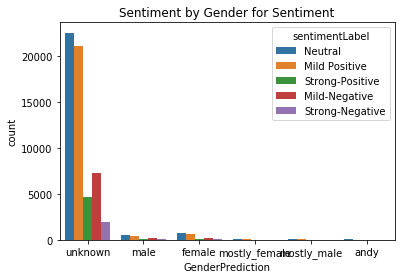

In [10]:
sns.countplot(x="GenderPrediction", hue="sentimentLabel", data=df)
plt.title("Sentiment by Gender for Sentiment")

##### Analysis:
In our May sentiment analysis piece, we can see that he majority of the tweets are Mild Positive, excluding neutral. These tweets come from the all of the tweets recorded in the JSON file (61,000+).